### Masive Data Lab Activities

Description : Read and Cleaning Data
File        : qtum_price.csv 
Name        : Yudi Aditya

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Bitcoin Cash Price

#### 1. Reading Data

In [2]:
# Read Bitcoin Cash Price
df1 = pd.read_csv('../data/raw/cryptocurrencypricehistory/qtum_price.csv', parse_dates = ['Date'])
df1.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-09-05,11.07,12.07,8.77,11.71,"218,917,000","653,177,000"
1,2017-09-04,15.29,15.44,10.22,10.98,"161,203,000","902,407,000"
2,2017-09-03,16.41,16.74,14.19,15.29,"98,105,400","967,971,000"
3,2017-09-02,18.26,19.06,15.51,16.39,"123,479,000","1,077,370,000"
4,2017-09-01,17.30,18.47,16.94,18.26,"73,618,500","1,020,980,000"


In [3]:
type(df1.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [4]:
# Set Date as it's index
df1.set_index('Date', inplace = True )

In [5]:
# Get General Information regarding data frame
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2017-09-05 to 2017-08-07
Data columns (total 6 columns):
Open          30 non-null float64
High          30 non-null float64
Low           30 non-null float64
Close         30 non-null float64
Volume        30 non-null object
Market Cap    30 non-null object
dtypes: float64(4), object(2)
memory usage: 1.6+ KB


- The data frame has 30 entries and 6 columns. 
- All columns has 30 elements, probably there's no missing data. To make it sure, We'll see for this
- Volume and market cap's data type are an object, it should be number.

In [6]:
# Replace missing data as NaN
df1.replace('-', np.nan,inplace=True)
# Count missing data
df1.isnull().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

#### 2. Cleaning Data Part (Deal with Wrong Format)

Problem :
- Some data has different format, therefore Volume recognize as a string, not a number.

Solution:
- Convert to float number

In [7]:
print('Volume Data Type :', type(df1.Volume[0]))
print('Market Cap Data Type :', type(df1['Market Cap'][0]))

Volume Data Type : <class 'str'>
Market Cap Data Type : <class 'str'>


In [8]:
#convert data to number
def convert_to_number(x):
    try:
        return int(x.replace(',',''))
    except:
        return x

df1.Volume = df1.Volume.apply(convert_to_number)
df1['Market Cap'] = df1['Market Cap'].apply(convert_to_number)

df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2017-09-05 to 2017-08-07
Data columns (total 6 columns):
Open          30 non-null float64
High          30 non-null float64
Low           30 non-null float64
Close         30 non-null float64
Volume        30 non-null int64
Market Cap    30 non-null int64
dtypes: float64(4), int64(2)
memory usage: 2.9 KB


In [9]:
df1.describe()

,Open,High,Low,Close,Volume,Market Cap
count,30.000000,30.000000,30.000000,30.000000,3.000000e+01,3.000000e+01
mean,14.025667,15.123333,12.770667,14.101333,8.388731e+07,8.275040e+08
std,2.341807,2.426717,2.220717,2.274853,4.988998e+07,1.381926e+08
min,10.030000,11.410000,8.770000,10.980000,2.508630e+07,5.917900e+08
25%,11.817500,12.765000,10.880000,11.817500,5.259382e+07,6.973672e+08
50%,14.140000,15.430000,12.835000,14.125000,7.328700e+07,8.341485e+08
75%,15.577500,16.645000,14.352500,15.627500,9.748660e+07,9.192718e+08
max,19.050000,20.040000,16.940000,19.150000,2.189170e+08,1.124200e+09


#### 3. Cleaning Data 2 (Deal with Missing Data)

In [10]:
df1.isna().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

All data is clear

#### 4. Data Visualization

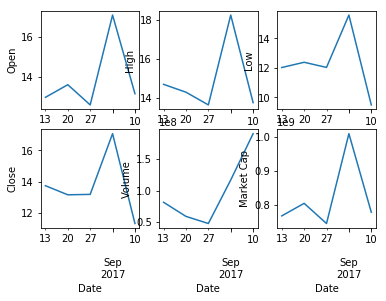

In [12]:
# Visualization the average of Open based on time (Week)
%matplotlib inline
    
plt.subplot(2,3,1)
plt.ylabel('Open')
df1.Open.resample('W').mean().plot()

plt.subplot(2,3,2)
plt.ylabel('High')
df1.High.resample('W').mean().plot()

plt.subplot(2,3,3)
plt.ylabel('Low')
df1.Low.resample('W').mean().plot()

plt.subplot(2,3,4)
plt.ylabel('Close')
df1.Close.resample('W').mean().plot()

plt.subplot(2,3,5)
plt.ylabel('Volume')
df1['Volume'].resample('W').mean().plot()

plt.subplot(2,3,6)
plt.ylabel('Market Cap')
df1['Market Cap'].resample('W').mean().plot()